<a href="https://colab.research.google.com/github/ceyxasm/implementations/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
#data read
#dataset- https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/IPL Matches 2008-2020.csv')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [81]:
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
team=[]
for i in team1:
  if i not in team:
    team.append(i)
    print(i)

#all these teams have however not been part of all the seasons
#teams that have been part of all the seasons are:
#Royal Challengers Bangalore
#Kings XI Punjab
#Mumbai Indians
#Kolkata Knight Riders
#Rajasthan Royals
#Chennai Super Kings
####>>>>  https://www.quora.com/Is-there-any-IPL-player-who-played-in-all-season-from-the-same-team
#to make our analysis more uniform, we will be limiting ourself to these teams only and dropping the remaining
##LETS HOPE THIS DOESNOT CONTRIBUTE TO SAMPLING BAIS



Royal Challengers Bangalore
Kings XI Punjab
Delhi Daredevils
Mumbai Indians
Kolkata Knight Riders
Rajasthan Royals
Deccan Chargers
Chennai Super Kings
Kochi Tuskers Kerala
Pune Warriors
Sunrisers Hyderabad
Gujarat Lions
Rising Pune Supergiants
Rising Pune Supergiant
Delhi Capitals


In [82]:
#data preprocessing
row=data.shape[0]
drop_label=[]
drop_team=[ "Kochi Tuskers Kerala", "Pune Warriors",  "Gujarat Lions",
            "Rising Pune Supergiants", "Rising Pune Supergiant"   ]

for i in drop_team:
  data = data.loc[data["team1"] != i]
  data=  data.loc[data["team2"] != i]
print("data points before dropping: "+str(row)+"\ndata points after dropping: "+str(data.shape[0]))

data=data.replace({"Deccan Chargers":"Sunrisers Hyderabad","Delhi Capitals": "Delhi Daredevils" })
#"Deccan Chargers"--->"Sunrisers Hyderabad"
#"Delhi Capitals"----> "Delhi Daredevils"



data points before dropping: 816
data points after dropping: 701


In [83]:
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
winner=np.array(data.iloc[:,10])
n_matches=len(team1)

team=[]
for i in range(len(team1)):
  if team1[i] not in team:
    team.append(team2[i])
  if team2[i] not in team:
    team.append(team2[i])

    
team_code=[]
for i in team:
  x=i.split()
  code=""
  for j in x:
    code+=j[0]
  team_code.append(code)
  print(code+" "+i+"\n")



KKR Kolkata Knight Riders

CSK Chennai Super Kings

RR Rajasthan Royals

RCB Royal Challengers Bangalore

SH Sunrisers Hyderabad

KXP Kings XI Punjab

DD Delhi Daredevils

MI Mumbai Indians



In [84]:
for i in range(n_matches):
  for j in range(len(team)):
    if team1[i]==team[j]: team1[i]=team_code[j]
    if team2[i]==team[j]: team2[i]=team_code[j]
    if winner[i]==team[j]: winner[i]=team_code[j]

team=team_code

KKR {'wins': 91, 'loss': 86, 'matches': 177, 'cups': 2, 'turnout': 1.058139534883721}
CSK {'wins': 101, 'loss': 69, 'matches': 170, 'cups': 3, 'turnout': 1.463768115942029}
RR {'wins': 76, 'loss': 78, 'matches': 154, 'cups': 1, 'turnout': 0.9743589743589743}
RCB {'wins': 79, 'loss': 100, 'matches': 179, 'cups': 0, 'turnout': 0.79}
SH {'wins': 83, 'loss': 100, 'matches': 183, 'cups': 1, 'turnout': 0.83}
KXP {'wins': 80, 'loss': 95, 'matches': 175, 'cups': 0, 'turnout': 0.8421052631578947}
DD {'wins': 77, 'loss': 101, 'matches': 178, 'cups': 1, 'turnout': 0.7623762376237624}
MI {'wins': 111, 'loss': 75, 'matches': 186, 'cups': 5, 'turnout': 1.48}


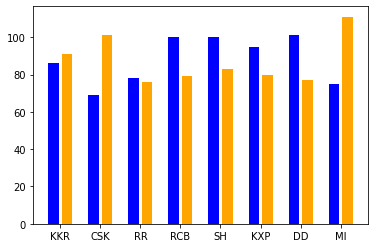

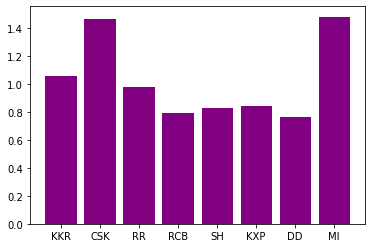

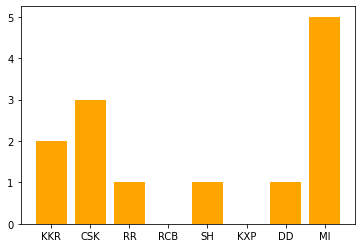

In [90]:
matches={}

for i in range(n_matches):
  if team1[i] not in matches:
    matches[team1[i]]={'wins':0,
                      'loss':0,
                      'matches':1}
  else: matches[team1[i]]['matches']+=1
  if winner[i]==team1[i]:
    matches[team1[i]]['wins']+=1
  else: matches[team1[i]]['loss']+=1

for i in range(n_matches):
  matches[team2[i]]['matches']+=1
  if winner[i]==team2[i]:
    matches[team2[i]]['wins']+=1
  else: matches[team2[i]]['loss']+=1

##adding number of season wins: 0 for RCB 3 for CSK like that
###>>>>>>>>>>>>>data compiled only till 2020 so dropping CSKs 2021 win; maybe u can contribute to the data set
for i in team:
  matches[i]['cups']=0
matches['MI']['cups']=5
matches['CSK']['cups']=3
matches['SH']['cups']=1
matches['RR']['cups']=1
matches['DD']['cups']=1
matches['KKR']['cups']=2

wins=[]
loss=[]
turnout=[]
cups=[]
for i in team_code:
  matches[i]['turnout']=matches[i]['wins']/matches[i]['loss']
  wins.append(matches[i]['wins'])
  loss.append(matches[i]['loss'])
  turnout.append(matches[i]['turnout'])
  cups.append(matches[i]['cups'])
  print(i, matches[i])

x_axis=np.arange(len(team))*3
plt.bar(x_axis-0.5, loss, color='blue', label='loss' )
plt.bar(x_axis+0.5, wins, color='orange',label='wins' )
plt.xticks(x_axis, team)
plt.show()

plt.bar(team, turnout, color='purple')
plt.show()
plt.bar(team, cups, color='orange' )
plt.show()